# Introduction to Deep Learning with Python and Theano

## Today's Talk

* Theano
    * Theano introduction
    * Linear Regression
    * Logistic Regression
    * Multi class classsification
        * MNIST digit detection problem
    * Exercise1: Use ReLU, Dropout and a deeper network
    * Exercise2: Number hallucination

### Disclaimer, It won't be like this...
```python
layer {
  name: "conv1"
  type: "Convolution"
  param { lr_mult: 1 }
  param { lr_mult: 2 }
  convolution_param {
    num_output: 20
    kernel_size: 5
    stride: 1
    weight_filler {
      type: "xavier"
    }
    bias_filler {
      type: "constant"
    }
  }
  bottom: "data"
  top: "conv1"
}
```

## Theano Introduction

### What is Theano?

* Python library that can work with symbolic mathematical expressions
    * *Symbolic differentation*: symbolic graphs for computing gradients
* Optimized for multi-dimensional arrays, like numpy.ndarray
    * Tensors
* Same code can work in CPU or GPU
    * Optimizes and compiles expression graphs with **g++** or **nvcc**
* Named after the Greek philosopher and mathematician


### Installing Theano
* Requirements
  * OS: Linux, Mac OS X, Windows
  * Python: >= 2.6
  * Numpy, Scipy, BLAS
 * pip install [--upgrade] theano
 * from source: pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git
 * docker pull csegura/machinelearning_python (CUDA 7.5-18)

### Building Symbolic Expressions, basic operators

* Tensor
  * Scalars:   0th-order tensor, tensor.scalar()
  * Vectors:   1th-order tensor, tensor.vector()
  * Matrices:  2th-order tensor, tensor.matrix()
  * Tensors:   ....            , tensor.tensor3(), tensor.tensor4()
  
* Reductions
 * tensor.sum(), tensor.sum(axis= (0,1))
 * tensor.max()
 * tensor.mean()
* Dimshuffle
 * Transpose
 * broadcast (adding to a larger tensor)


### Scalar Math
```python
from theano import tensor as T
x = T.scalar()
y = T.scalar()
z = x + y
w = z * x
a = T.sqrt(w)
c = a ** b
d = T.log(c)
```


### Vector and Matrix Math

```python
from theano import tensor as T
x = T.vector()
y = T.vector()
#element wise multiplication
a = x * y
# vector dot product
b = T.dot(x,y)

z = T.matrix()
#matrix-vector multiplication
c = T.dot(z,a)
```

## Theano simple example

In [38]:
import theano
from theano import tensor

In [39]:
# declare two symbolic floating-point scalars
a = tensor.dscalar( )
b = tensor.dscalar()

In [40]:
# create a simple expression
y = a + b

/usr/local/lib/python2.7/dist-packages/theano/tensor/var.py:134: UserWarning: Warning, Cannot compute test value: input 0 (<TensorType(float64, scalar)>) of Op Elemwise{add,no_inplace}(<TensorType(float64, scalar)>, <TensorType(float64, scalar)>) missing default value
  return theano.tensor.basic.add(self, other)
/usr/local/lib/python2.7/dist-packages/theano/tensor/var.py:134: UserWarning: Warning, Cannot compute test value: input 1 (<TensorType(float64, scalar)>) of Op Elemwise{add,no_inplace}(<TensorType(float64, scalar)>, <TensorType(float64, scalar)>) missing default value
  return theano.tensor.basic.add(self, other)


In [41]:
# convert the expression into a callable object that 
# takes (a,b) symbolic inputs values
# as input and computes a value for y
add_function = theano.function(inputs=[a,b], outputs=y)

In [5]:
print add_function(2,5)
print add_function(3.5, 3.33333)  

7.0
6.83333


## Linear Regression example

<img src="http://www.atmos.washington.edu/~robwood/teaching/451/labs/images/concepts12.jpg">

In [6]:
import theano
from theano import tensor as T
import numpy as np
theano.config.compute_test_value = 'warn' #Default is off

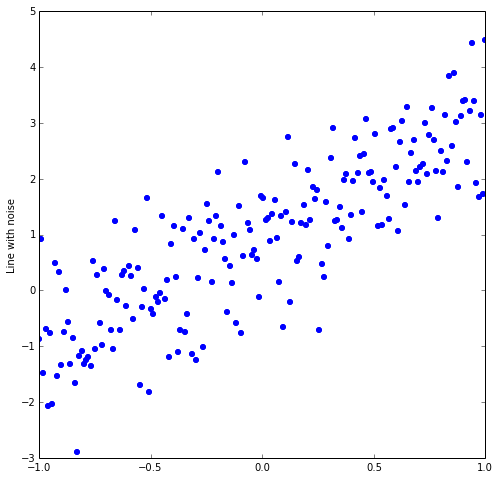

In [7]:
trainX = np.linspace(-1,1, 200 ).astype(theano.config.floatX)
trainY = (2 * trainX + 1.0 + np.random.randn(*trainX.shape)*0.8).astype(theano.config.floatX)

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure( figsize=(8, 8))
plt.plot(trainX, trainY, 'bo', markeredgecolor='none')
plt.ylabel('Line with noise')
plt.show()

In [8]:
def linear_model(x, w, b):
    return x * w + b

w = theano.shared( np.random.randn(1).astype(theano.config.floatX)[0])
b = theano.shared( np.random.randn(1).astype(theano.config.floatX)[0])

x = T.vector("x")
y = T.vector("y")

x.tag.test_value = np.random.rand( 5, ).astype(theano.config.floatX)
y.tag.test_value = np.random.rand( 5, ).astype(theano.config.floatX)

y_pred = linear_model(x,w,b)

#Compute gradients and training function
my_cost = T.mean(T.sqr(y-y_pred))
gradient = T.grad(cost=my_cost, wrt=[w,b])

learning_rate = 0.1
updates = [[w, w - gradient[0] * learning_rate], 
           [b, b - gradient[1] * learning_rate]]

train = theano.function(inputs=[x,y], outputs=my_cost, updates=updates)

In [9]:
current_cost = train(trainX, trainY)
print "Current cost: " + str(current_cost)
print "W: " + str(w.get_value())
print "b: "+ str(b.get_value())

Current cost: 13.3738489151
W: 0.153922
b: -1.73734


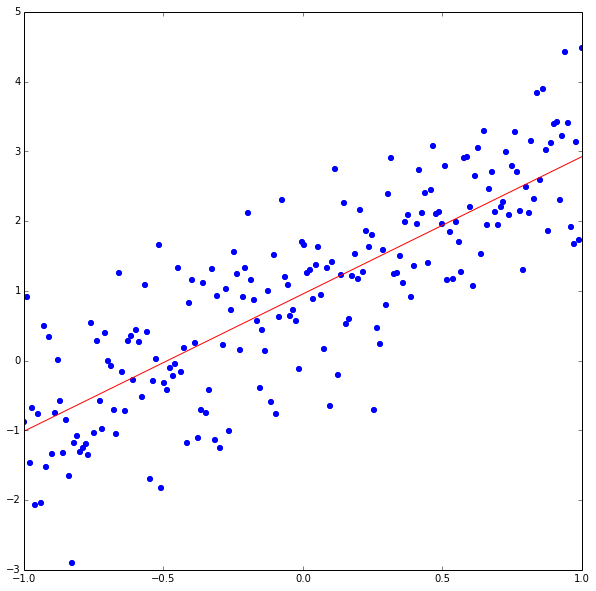

Cost: 0.638934731483 w:1.96874 b:0.955294


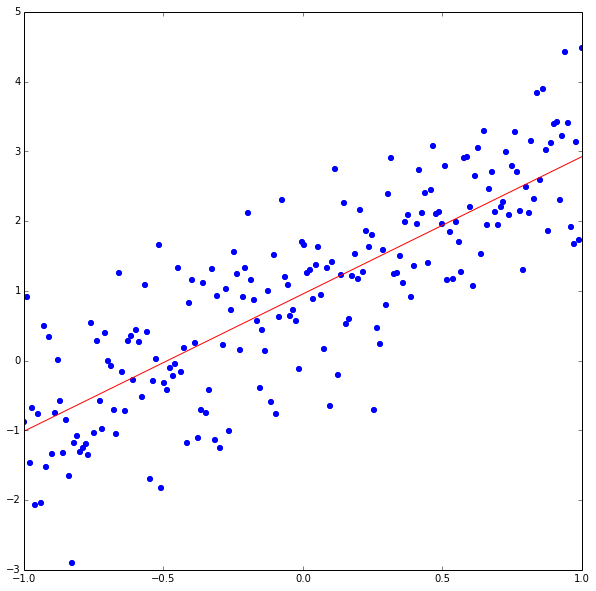

In [10]:
%matplotlib inline
import time
import pylab as plt
from IPython import display

w.set_value(-1.0)
b.set_value(3.0)
fig = plt.figure( figsize=(10, 10))
for epoch in range(50):
    current_cost = train(trainX, trainY)
    current_w = w.get_value()
    current_b = b.get_value()
    
    plt.clf()
    plt.plot(trainX, trainY,'o',color='b', markeredgecolor='none')
    plt.plot(trainX, trainX*current_w + current_b, color='r',)
    print 'Cost: ' + str(current_cost) + ' w:' + str(current_w) + ' b:' + str(current_b)
    display.clear_output(wait=True)
    display.display(plt.gcf())

print 'Cost: ' + str(current_cost) + ' w:' + str(current_w) + ' b:' + str(current_b)

## Logistic Regression example

<img src="http://diffsharp.github.io/DiffSharp/img/examples-neuralnetworks-neuron.png" alt="Single Neuron Logistic Function" style="width: 400px;">


<img src=https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg style="width: 300px;" ALIGN="right" >
Sigmoid function: $$\sigma ( z ) = \frac{1}{1+e^{-z}}$$ 

Output a: $$ a = \sigma(  \sum_{i=0}^{n}{x_{i} \cdot w_{i}} + b )$$ 
$$ a = \sigma( {\bf x} \cdot {\bf W} + b) $$

where $ {\bf x} = \begin{pmatrix} x_1 \cdots  x_n  \end{pmatrix} $

and $  {\bf W} = \begin{pmatrix} w_1 \cdots  w_n  \end{pmatrix}^T $

### Let's write it in Theano! 

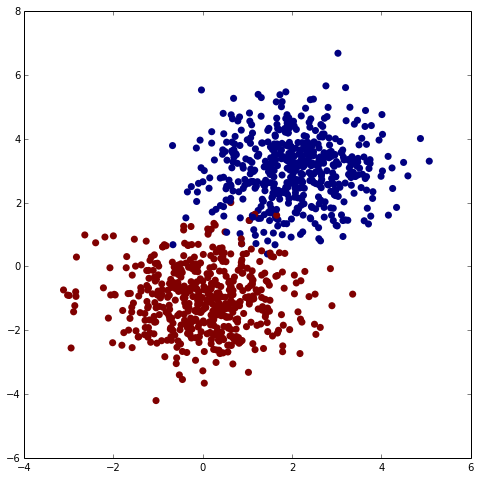

In [26]:
import numpy as np

# Create dataset
%matplotlib inline
import matplotlib.pyplot as plt

XX1 = np.concatenate( (np.random.randn( 500,2) + [2,3], 
                       np.random.randn( 500,2) + [0,-1]), axis=0)
YY1 = np.concatenate( (np.zeros((500,1)), np.ones((500,1))), axis=0)
indexes=np.arange(1000)
np.random.shuffle(indexes)
YY1=YY1[indexes,:].astype(theano.config.floatX)
XX1=XX1[indexes,:].astype(theano.config.floatX)
fig = plt.figure( figsize=(8, 8))
plt.scatter(XX1[:, 0], XX1[:, 1], marker='o', c=YY1, s=50, lw = 0)
plt.show()


In [30]:
import theano
from theano import tensor as T
theano.config.compute_test_value = 'warn' #Default is off

sigmoid = T.nnet.sigmoid

def linear_model(X, W, b):
    return T.dot(X, W)+b

W = theano.shared( np.random.randn(2,1).astype(theano.config.floatX))
b = theano.shared( np.random.randn(1).astype(theano.config.floatX)[0] )

X = T.matrix("X")
y = T.matrix("y")

X.tag.test_value = np.random.rand( 5,2 ).astype(theano.config.floatX)
y.tag.test_value = np.random.rand( 5, 1).astype(theano.config.floatX)

y_pred = sigmoid(linear_model(X,W,b))


In [31]:
#binary cross-entropy cost function
my_cost = -T.mean(y*T.log(y_pred) + (1.0-y)*T.log(1.0-y_pred))

params = [W,b]
gradient = T.grad(cost=my_cost, wrt=params)

#updates = [[w, w - gradient[0] * lr], [b, b - gradient[1] * lr]]
learning_rate = 0.3
updates = []
for param_i, grad_i in zip(params, gradient):
    updates.append((param_i, param_i - learning_rate * grad_i))
    
train = theano.function(inputs=[X,y], outputs=my_cost, updates=updates)

#### Decision boundary
<img src=https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg style="width: 300px;" ALIGN="right" >

$ sigmoid(z) = 0.5$

which means that:

$z=0.0$

In our regression model we have:

$z = x1 \cdot w1 + x2 \cdot w2 + b = 0$

We can draw the line in the x1 , x2 plane:

$x2 = (-b -x1 \cdot w1)/w2$

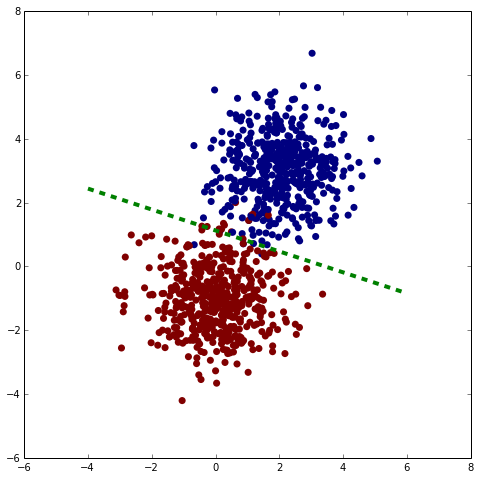

0.0540250018239


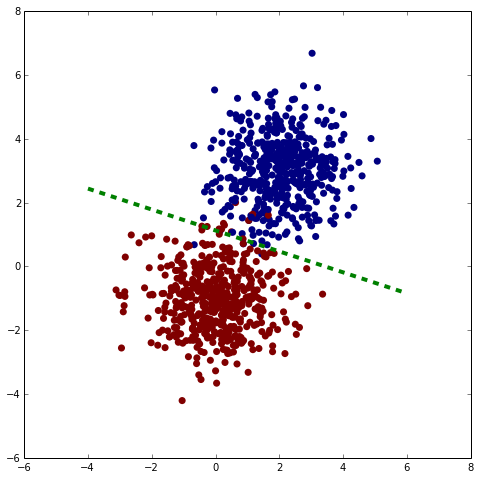

In [37]:
from IPython import display
x1= np.linspace(-4,6, 200 )
fig = plt.figure( figsize=(8, 8))
for epoch in range(50):
    current_cost = train(XX1, YY1)
    #Get current weights
    current_W = W.get_value()
    current_b = b.get_value()
    #draw decision boundary
    x2 = (-current_b -x1*current_W[0])/current_W[1]
    plt.clf()
    plt.scatter(XX1[:, 0], XX1[:, 1], marker='o', c=YY1, s=50, lw = 0)
    plt.plot(x1,x2, "g--", lw=4)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    print current_cost

### Multi-class Classification Network

<img src="2layersGeneric.png" alt="Multiple classes" style="width: 500px;" ALIGN="right" >
Layer outputs:

$${\bf x}^2 = h^1(  {\bf x}^1 \cdot {\bf W}^1 + {\bf b}^1 )  $$

$${\bf x}^3 = h^2(  {\bf x}^2 \cdot {\bf W}^2 + {\bf b}^2 )  $$

where $ {\bf x} = \begin{pmatrix} x_1 \cdots  x_n  \end{pmatrix} $ 

$ {\bf b} = \begin{pmatrix} b_1 \cdots  b_m  \end{pmatrix} $ 

$  {\bf W} = \begin{pmatrix} w_{1,1} \cdots  w_{1,m} \\ 
\vdots \cdots  \vdots \\
w_{n,1} \cdots w_{n,m} \\
\end{pmatrix} $

$ h(  ) $ is the activation function (ReLU, sigmoid, Softmax etc)

For Multi-class classification: $h^2( \cdot ) = softmax$ 


In [15]:
import numpy as np

def one_hot(x,n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x),n))
    o_h[np.arange(len(x)),x] = 1
    return o_h

#download database
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST Original")
mnist.target = mnist.target.astype(np.uint8)
mnist.data = (mnist.data/255.0).astype(theano.config.floatX)

#shuffle data
indexes=np.arange(mnist.data.shape[0])
np.random.shuffle(indexes)
mnist.target=mnist.target[indexes]
mnist.data = mnist.data[indexes,:]

#Partition train test
ntrain=60000
trainX=mnist.data[0:ntrain,:]
trainY = one_hot(  mnist.target[0:ntrain],10).astype(theano.config.floatX)
testX=mnist.data[ntrain:,:]
testY = one_hot(  mnist.target[ntrain:],10).astype(theano.config.floatX)

print "trainX.shape: " + str(trainX.shape)
print "trainY.shape: " + str(trainY.shape)
print "testX.shape: " + str(testX.shape)
print "testY.shape: " + str(testY.shape)

trainX.shape: (60000, 784)
trainY.shape: (60000, 10)
testX.shape: (10000, 784)
testY.shape: (10000, 10)


[]

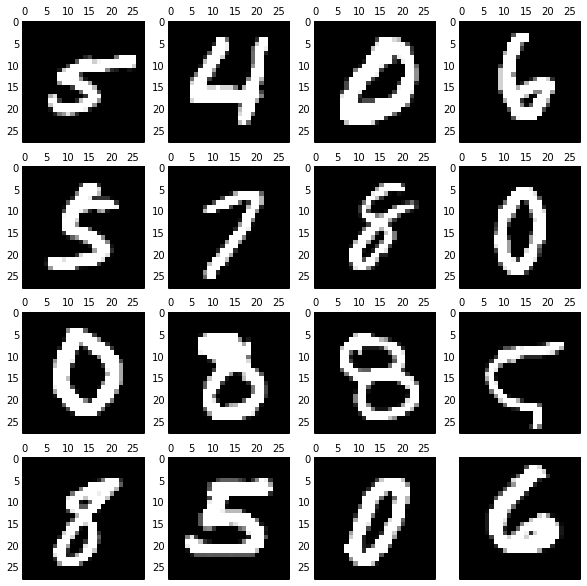

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
show_data = np.copy(testX[0:16,:])
fig, axes = plt.subplots(4, 4, figsize=(10,10))
vmin, vmax = show_data.min(), show_data.max()
for coef, ax in zip(show_data, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
           vmax=.5 * vmax)
ax.set_xticks(())
ax.set_yticks(())

In [17]:
import theano
from theano import tensor as T
import numpy as np
theano.config.compute_test_value = 'warn' #Default is off

sigmoid = T.nnet.sigmoid
softmax = T.nnet.softmax

def linear_model(X, W, b):
    return T.dot(X, W) + b.dimshuffle('x',0)

n_input1=28*28 #784
n_output1=128
W1 = theano.shared( np.random.randn(n_input1, n_output1).astype(theano.config.floatX)*0.01)
b1 = theano.shared( np.random.randn(n_output1).astype(theano.config.floatX) *0.01)

n_input2=n_output1
n_output2=10
W2 = theano.shared( np.random.randn(n_input2, n_output2).astype(theano.config.floatX) * 0.01)
b2 = theano.shared( np.random.randn(n_output2).astype(theano.config.floatX) * 0.01 )


X = T.matrix("X")
y = T.matrix("y")

X.tag.test_value = np.random.rand( 5,n_input1 ).astype(theano.config.floatX)
y.tag.test_value = np.ones( (5, 10) ).astype(theano.config.floatX)

X2 = sigmoid(linear_model(X,W1,b1))
py_x = softmax(linear_model(X2, W2, b2) )

y_pred = T.argmax(py_x, axis=1)

In [18]:
#Compute gradients and training function
my_cost = T.mean(T.nnet.categorical_crossentropy(py_x, y))

params = [W1,b1, W2, b2]
gradient = T.grad(cost=my_cost, wrt=params)

learning_rate = 0.1
updates = []
for param_i, grad_i in zip(params, gradient):
    updates.append((param_i, param_i - learning_rate * grad_i))
    
train = theano.function(inputs=[X,y], outputs=my_cost, updates=updates)
predict  = theano.function(inputs=[X], outputs=y_pred)

In [19]:
from IPython import display

mbatch_size = 200
n_epochs = 50
n_batches_train=trainX.shape[0]/mbatch_size
for epoch in range(n_epochs):
    for i in range(n_batches_train):
        start_idx = mbatch_size*i
        end_idx = mbatch_size*(i+1)        
        current_cost = train(trainX[start_idx:end_idx,:], trainY[start_idx:end_idx,:])

    display.clear_output(wait=True)
    print "Epoch " + str(epoch) + " current cost " + str(current_cost)
    print "Accuracy: " + str(np.mean(np.argmax(testY, axis=1) == predict(testX)))

Epoch 49 current cost 0.0942694246769
Accuracy: 0.9541


### Let's see some of the weights of the first layer

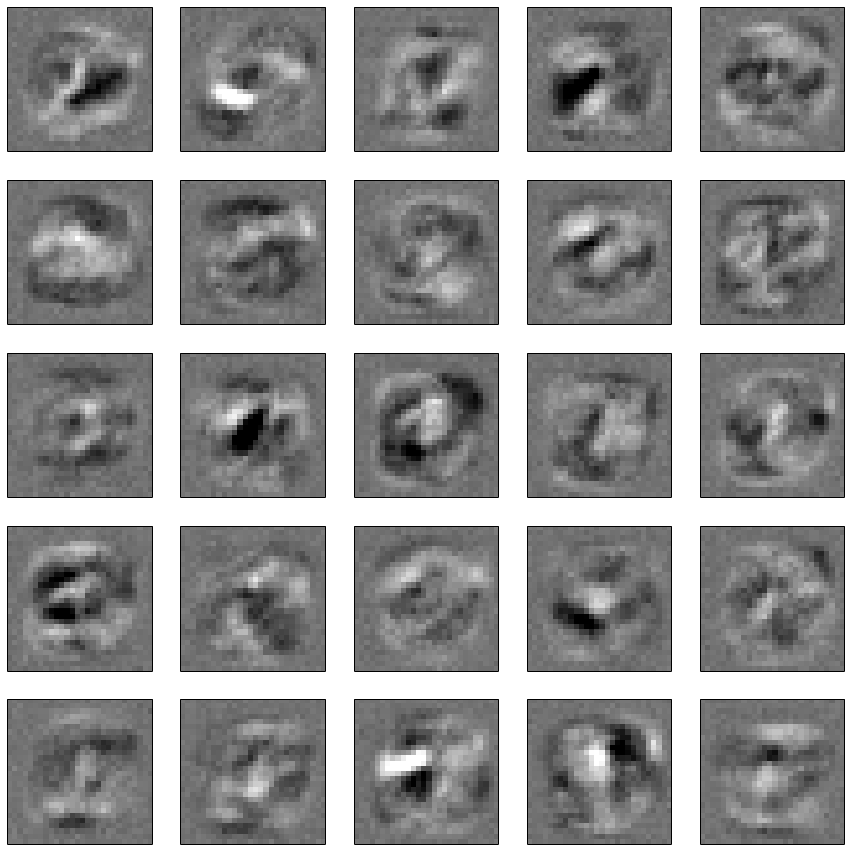

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(15,15))
   
vmin, vmax = W1.get_value().min(), W1.get_value().max()
for coef, ax in zip(W1.get_value().T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
           vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

### Exercise 1
#### Update the network at little
* More layers (at least 3)
* Use ReLU or leaky_ReLU
* Use Dropout for training
* Don't use dropout for prediction!

In [21]:
## LOAD DATA
import theano
import numpy as np

def one_hot(x,n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x),n))
    o_h[np.arange(len(x)),x] = 1
    return o_h

#download database
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST Original")
mnist.target = mnist.target.astype(np.uint8)
mnist.data = (mnist.data/255.0).astype(theano.config.floatX)

#shuffle data
indexes=np.arange(mnist.data.shape[0])
np.random.shuffle(indexes)
mnist.target=mnist.target[indexes]
mnist.data = mnist.data[indexes,:]

#Partition train test
ntrain=60000
trainX=mnist.data[0:ntrain,:]
trainY = one_hot(  mnist.target[0:ntrain],10).astype(theano.config.floatX)
testX=mnist.data[ntrain:,:]
testY = one_hot(  mnist.target[ntrain:],10).astype(theano.config.floatX)

In [22]:
import theano
from theano import tensor as T
import numpy as np
theano.config.compute_test_value = 'warn' #Default is off

#Activations
sigmoid = T.nnet.sigmoid
softmax = T.nnet.softmax
def relu(x):
    return T.maximum(x, 0.0)

#Leaky ReLU
def leaky_relu(x,c): 
    return T.switch(x<0, x*c, x)
#c has to be a shared variable, since we want to optimize it
c=theano.shared(np.asarray(-0.01, dtype=theano.config.floatX))
#z=leaky_relu(x, c)    

from theano.tensor.shared_randomstreams import RandomStreams
srng = RandomStreams(seed=234)
#Dropout
def dropout(X, p=0.):
    if p> 0:
        retain_prob = 1 - p
        X = X / retain_prob * srng.binomial(X.shape, p=retain_prob, dtype='int32').astype(theano.config.floatX)
    return X

def linear_model(X, W, b):
    return T.dot(X, W) + b.dimshuffle('x',0)

n_input1=28*28
n_output1=128
W1 = theano.shared( np.random.randn(n_input1, n_output1).astype(theano.config.floatX)*0.01)
b1 = theano.shared( np.random.randn(n_output1).astype(theano.config.floatX) *0.01)

n_input2=n_output1
n_output2=10
W2 = theano.shared( np.random.randn(n_input2, n_output2).astype(theano.config.floatX) * 0.01)
b2 = theano.shared( np.random.randn(n_output2).astype(theano.config.floatX) * 0.01 )


X = T.matrix("X")
y = T.matrix("y")

X.tag.test_value = np.random.rand( 5,n_input1 ).astype(theano.config.floatX)
y.tag.test_value = np.ones( (5, 10) ).astype(theano.config.floatX)

X2 = sigmoid(linear_model(X, W1, b1))
py_x = softmax(linear_model(X2, W2, b2) )

y_pred = T.argmax(py_x, axis=1)

#Compute gradients and training function
my_cost = T.mean(T.nnet.categorical_crossentropy(py_x, y))

params = [W1,b1, W2, b2]
gradient = T.grad(cost=my_cost, wrt=params)

learning_rate = 0.1
updates = []
for param_i, grad_i in zip(params, gradient):
    updates.append((param_i, param_i - learning_rate * grad_i))
    
train = theano.function(inputs=[X,y], outputs=my_cost, updates=updates)
predict  = theano.function(inputs=[X], outputs=y_pred)

In [23]:
#Training
from IPython import display

mbatch_size = 500
n_epochs = 10
n_batches_train=trainX.shape[0]/mbatch_size
for epoch in range(n_epochs):
    for i in range(n_batches_train):
        start_idx = mbatch_size*i
        end_idx = mbatch_size*(i+1)        
        current_cost = train(trainX[start_idx:end_idx,:], trainY[start_idx:end_idx,:])

    display.clear_output(wait=True)
    print "Epoch " + str(epoch) + " current cost " + str(current_cost)
    print "Accuracy: " + str(np.mean(np.argmax(testY, axis=1) == predict(testX)))

Epoch 9 current cost 0.443958461285
Accuracy: 0.8834


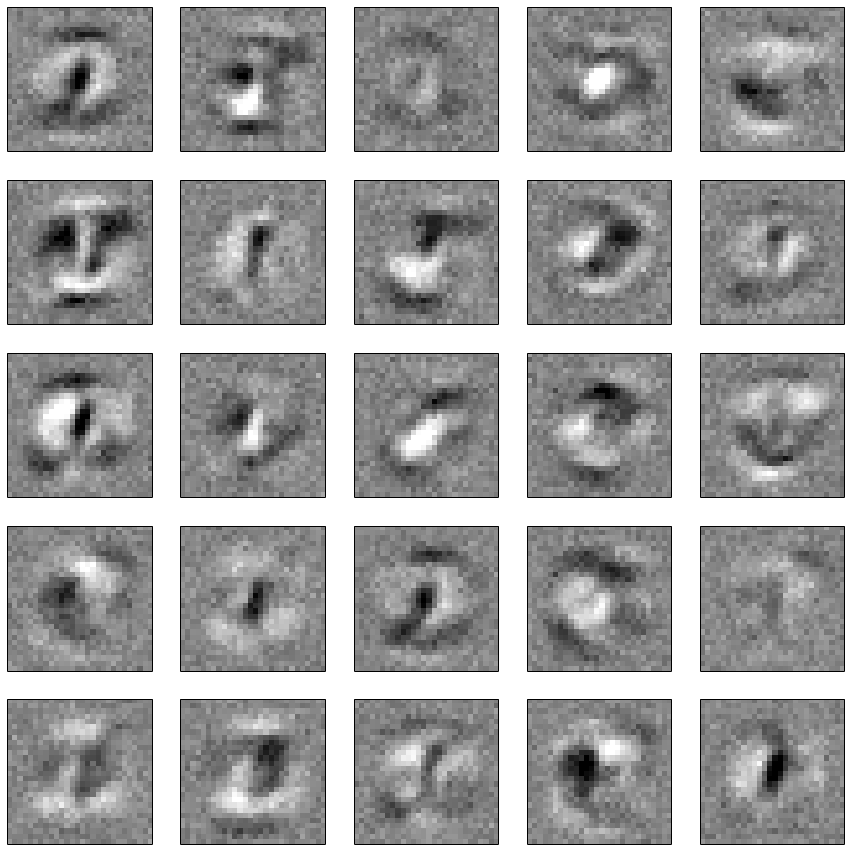

In [24]:
#View some of the weights of the first layer
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(15,15))
   
vmin, vmax = W1.get_value().min(), W1.get_value().max()
for coef, ax in zip(W1.get_value().T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
           vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

### Exercise 2
#### Image hallucination

Reusing pretrained weights W1,b1,W2,b2 initialize X with a sample random image and optimize its pixels to minimize the crossentropy between 
py_x_sample and y

Load Data, no need to modify nothing here, just run it to load the database

In [ ]:
## LOAD DATA
import numpy as np
import theano

def one_hot(x,n):
    if type(x) == list:
        x = np.array(x)
    x = x.flatten()
    o_h = np.zeros((len(x),n))
    o_h[np.arange(len(x)),x] = 1
    return o_h

#download database
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST Original")
mnist.target = mnist.target.astype(np.uint8)
mnist.data = (mnist.data/255.0).astype(theano.config.floatX)

#shuffle data
indexes=np.arange(mnist.data.shape[0])
np.random.shuffle(indexes)
mnist.target=mnist.target[indexes]
mnist.data = mnist.data[indexes,:]

#Partition train test
ntrain=60000
trainX=mnist.data[0:ntrain,:]
trainY = one_hot(  mnist.target[0:ntrain],10).astype(theano.config.floatX)
testX=mnist.data[ntrain:,:]
testY = one_hot(  mnist.target[ntrain:],10).astype(theano.config.floatX)

Train a simple network, no need to change anything here, just run it to train parameters

In [ ]:
import theano
from theano import tensor as T
import numpy as np
theano.config.compute_test_value = 'warn' #Default is off

sigmoid = T.nnet.sigmoid
softmax = T.nnet.softmax

def linear_model(X, W, b):
    return T.dot(X, W) + b.dimshuffle('x',0)

n_input1=28*28 #784
n_output1=128
W1 = theano.shared( np.random.randn(n_input1, n_output1).astype(theano.config.floatX)*0.01)
b1 = theano.shared( np.random.randn(n_output1).astype(theano.config.floatX) *0.01)

n_input2=n_output1
n_output2=10
W2 = theano.shared( np.random.randn(n_input2, n_output2).astype(theano.config.floatX) * 0.01)
b2 = theano.shared( np.random.randn(n_output2).astype(theano.config.floatX) * 0.01 )


X = T.matrix("X")
y = T.matrix("y")

X.tag.test_value = np.random.rand( 5,n_input1 ).astype(theano.config.floatX)
y.tag.test_value = np.ones( (5, 10) ).astype(theano.config.floatX)

X2 = sigmoid(linear_model(X,W1,b1))
py_x = softmax(linear_model(X2, W2, b2) )

y_pred = T.argmax(py_x, axis=1)

#Compute gradients and training function
my_cost = T.mean(T.nnet.categorical_crossentropy(py_x, y))

params = [W1,b1, W2, b2]
gradient = T.grad(cost=my_cost, wrt=params)

learning_rate = 0.1
updates = []
for param_i, grad_i in zip(params, gradient):
    updates.append((param_i, param_i - learning_rate * grad_i))
    
train = theano.function(inputs=[X,y], outputs=my_cost, updates=updates)
predict  = theano.function(inputs=[X], outputs=y_pred)

from IPython import display

mbatch_size = 200
n_epochs = 10
n_batches_train=trainX.shape[0]/mbatch_size
for epoch in range(n_epochs):
    for i in range(n_batches_train):
        start_idx = mbatch_size*i
        end_idx = mbatch_size*(i+1)        
        current_cost = train(trainX[start_idx:end_idx,:], trainY[start_idx:end_idx,:])

    display.clear_output(wait=True)
    print "Epoch " + str(epoch) + " current cost " + str(current_cost)
    print "Accuracy: " + str(np.mean(np.argmax(testY, axis=1) == predict(testX)))

Write missing parts with ??

Buld the model py_x_sample as a function of X_sample instead of X
Set patameters to optimize, X_sample in our case

In [ ]:
X_sample = theano.shared(np.ones( (1, n_input1) ).astype(theano.config.floatX)*0.1)
y.tag.test_value = np.ones( (1, 10) ).astype(theano.config.floatX)

#create the model again with X_sample instead of X
py_x_sample = ??

my_cost_sample = T.mean(T.nnet.categorical_crossentropy(py_x_sample, y))

#we want the gradients with respecto to X_sample
params_sample = ??
gradient_sample = T.grad(cost=my_cost_sample, wrt=params_sample)

learning_rate = 0.01
updates_sample = []
for param_i, grad_i in zip(params_sample, gradient_sample):
    updates_sample.append((param_i, param_i - learning_rate * grad_i))
    
hallucinate = theano.function(inputs=[y], outputs=my_cost_sample, updates=updates_sample)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#X_sample.set_value(np.ones( (1, n_input1) ).astype(theano.config.floatX)*0.1)
X_sample.set_value(np.random.randn(1, n_input1).astype(theano.config.floatX)*0.01 + 0.1)
dest_number=3

for i in range(100):
    cost = hallucinate(one_hot([dest_number],10).astype(theano.config.floatX))
    display.clear_output(wait=True)
    print "Cost " + str(cost)
    
cost = hallucinate(one_hot([dest_number],10).astype(theano.config.floatX))
print "Cost " + str(cost)
sample = X_sample.get_value()
plt.matshow(sample.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

print predict(sample)